## Examples

### Import packages

In [1]:
from classification import knn, log_reg, naive_bayes, perceptron, svm, tree
from regression import lin_reg
from ensemble import bagging, random_forest
from clustering import k_means
from utils.model_selection import train_test_split
from utils.metrics import accuracy_score, f1_score, mean_absolute_error
from utils.preprocessing import StandardScaler
from utils.misc import load_data
from utils.misc import kmeans_plot  # optional: requires matplotlib

In [2]:
breast_cancer = load_data("breast_cancer.csv")  # log_reg, perceptron, svm, tree, random_forest, bagging
iris = load_data("iris.csv")  # knn, naive_bayes, tree, kmeans
diabetes = load_data("diabetes.csv")  # lin_reg

### Binary classification

In [3]:
X, y = breast_cancer["features"], breast_cancer["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
n_samples, n_features = len(X_train), len(X_train[0])
print(f"Number of samples: {n_samples}, number of features: {n_features}")

scaler = StandardScaler().fit(X_train)
X_train_standard, X_test_standard = scaler.transform(X_train), scaler.transform(X_test)

Number of samples: 455, number of features: 30


In [4]:
log_reg_clf = log_reg.LogisticRegression(lr=0.01, n_iters=100)
y_pred = log_reg_clf.fit(X_train_standard, y_train).predict(X_test_standard)  # scale-sensitive

print(f"Logistic regression classifier accuracy: {accuracy_score(y_test, y_pred):.4f}, f1 score: {f1_score(y_test, y_pred):.4f}")

Logistic regression classifier accuracy: 0.9474, f1 score: 0.9516


In [5]:
perceptron_clf = perceptron.Perceptron(lr=0.01, n_iters=100)
y_pred = perceptron_clf.fit(X_train_standard, y_train).predict(X_test_standard)  # scale-sensitive

print(f"Perceptron classifier accuracy: {accuracy_score(y_test, y_pred):.4f}, f1 score: {f1_score(y_test, y_pred):.4f}")

Perceptron classifier accuracy: 0.9386, f1 score: 0.9440


In [6]:
svm_clf = svm.SVM(lr=0.01, lmbda=0.001, n_iters=100)
y_pred = svm_clf.fit(X_train_standard, y_train).predict(X_test_standard)  # scale-sensitive

print(f"SVM classifier accuracy: {accuracy_score(y_test, y_pred):.4f}, f1 score: {f1_score(y_test, y_pred):.4f}")

SVM classifier accuracy: 0.9474, f1 score: 0.9516


In [7]:
dt_clf = tree.DecisionTree(min_samples_split=2, max_depth=8, max_features=n_features, random_state=42)
y_pred = dt_clf.fit(X_train, y_train).predict(X_test)  # scale-invariant

print(f"Tree classifier accuracy: {accuracy_score(y_test, y_pred):.4f}, f1 score: {f1_score(y_test, y_pred):.4f}")

Tree classifier accuracy: 0.9298, f1 score: 0.9385


In [8]:
rf_clf = random_forest.RandomForest(n_trees=20, 
                                    tree_params={"max_depth": 5, "max_features": int(n_features / 4)}, 
                                    random_state=42)
y_pred = rf_clf.fit(X_train, y_train).predict(X_test)  # scale-invariant because of tree base estimator

print(f"Random forest classifier accuracy: {accuracy_score(y_test, y_pred):.4f}, f1 score: {f1_score(y_test, y_pred):.4f}")

Random forest classifier accuracy: 0.9561, f1 score: 0.9612


In [9]:
bag_clf = bagging.Bagging(n_estimators=10, 
                          base_estimator=tree.DecisionTree,
                          base_estimator_params={"max_depth": 5}, 
                          random_state=42)
y_pred = bag_clf.fit(X_train_standard, y_train).predict(X_test_standard)  # scale-invariance depends on base estimator

print(f"Bagging classifier accuracy: {accuracy_score(y_test, y_pred):.4f}, f1 score: {f1_score(y_test, y_pred):.4f}")

Bagging classifier accuracy: 0.9649, f1 score: 0.9692


### Multi-class classification

In [10]:
X, y = iris["features"], iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
n_samples, n_features = len(X_train), len(X_train[0])
print(f"Number of samples: {n_samples}, number of features: {n_features}")

scaler = StandardScaler().fit(X_train)
X_train_standard, X_test_standard = scaler.transform(X_train), scaler.transform(X_test)

Number of samples: 120, number of features: 4


In [11]:
nb_clf = naive_bayes.NaiveBayes()
y_pred = nb_clf.fit(X_train, y_train).predict(X_test)  # scale-invariant

print(f"Naive Bayes multi-class classifier accuracy: {accuracy_score(y_test, y_pred):.4f}")

Naive Bayes multi-class classifier accuracy: 0.9667


In [12]:
knn_clf = knn.KNN(k=5)
y_pred = knn_clf.fit(X_train_standard, y_train).predict(X_test_standard)  # scale-sensitive (due to distance metric)

print(f"KNN multi-class classifier accuracy: {accuracy_score(y_test, y_pred):.4f}")

KNN multi-class classifier accuracy: 0.9667


In [13]:
dt_clf = tree.DecisionTree(min_samples_split=2, max_depth=8, max_features=2, random_state=42)
y_pred = dt_clf.fit(X_train, y_train).predict(X_test)  # scale-invariant

print(f"Tree multi-class classifier accuracy: {accuracy_score(y_test, y_pred):.4f}")

Tree multi-class classifier accuracy: 0.8667


In [14]:
rf_clf = random_forest.RandomForest(n_trees=20, 
                                    tree_params={"max_depth": 5, "max_features": 3}, 
                                    random_state=42)
y_pred = rf_clf.fit(X_train, y_train).predict(X_test)  # scale-invariant

print(f"Random forest multi-class classifier accuracy: {accuracy_score(y_test, y_pred):.4f}")

Random forest multi-class classifier accuracy: 0.9667


### Clustering

In [15]:
X_train_standard_2d, X_test_standard_2d = [x[:2] for x in X_train_standard], [x[:2] for x in X_test_standard]

[0, 1, 0, 2, 1, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 2, 1, 1]


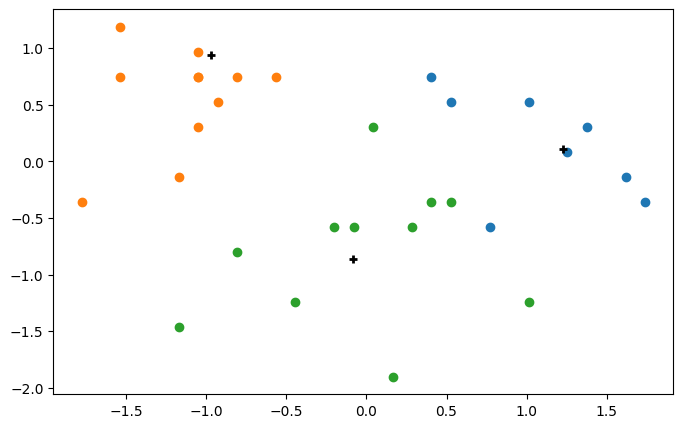

In [16]:
kmeans = k_means.KMeans(k=3, random_state=42)
y_pred, clusters, centroids = kmeans.fit(X_train_standard_2d).predict(X_test_standard_2d)  # scale-sensitive (due to distance metric)
print(y_pred)
kmeans_plot(X_test_standard_2d, clusters, centroids)  # optional: requires matplotlib

### Regression

In [17]:
X, y = diabetes["features"], diabetes["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
n_samples, n_features = len(X_train), len(X_train[0])
print(f"Number of samples: {n_samples}, number of features: {n_features}")

scaler = StandardScaler().fit(X_train)
X_train_standard, X_test_standard = scaler.transform(X_train), scaler.transform(X_test)

Number of samples: 353, number of features: 10


In [18]:
lr_reg = lin_reg.LinearRegression(lr=0.01, n_iters=1_000)
y_pred = lr_reg.fit(X_train_standard, y_train).predict(X_test_standard)  # scale-sensitive

mae = mean_absolute_error(y_test, y_pred)
mean_y_test = (sum(y_test) / len(y_test))
print(f"Linear regression MAE: {mae:.4f}, relative MAE: {mae / mean_y_test:.4f}")

Linear regression MAE: 44.8476, relative MAE: 0.2799
